In [1]:
import numpy as np
import sympy as sp
import pickle
from IPython.display import HTML
import ipywidgets as widgets
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
mpl.rcParams['legend.fontsize'] = 10
import pandas as pd
import itertools
pd.set_option('display.max_colwidth', None)
from sympy.plotting import plot 
from IPython.display import Image


# Render to Latex function 
def RTL(e):
    latex_rendering = []

    for i in range(len(e)):
        latex_rendering.append("$$" + sp.latex(e[i]) + "$$<br/>")
    
    return(HTML("".join(latex_rendering[0:])))

$$ f^{\prime\prime}(x) + 2f^\prime(x) = 3f(x)$$

Differential equation notes

- ODE if unknonwn function depends on 1 independent var8iable
- If depends on 2 or more, is PDE
- Order is the highest derivative appearing  in the equatioi



Chapter 4 gives some basics around terminology

Standard form: 


$$ \frac{dy}{dx} + Py = Q $$

$$ y\prime = f(x, y) $$

Note the RHS can be writeen as a quoteint of 2 functions $M(x, y)$ and $-N(x, y)$ which becomes $ \frac{dy}{dx} = \frac{M(x, y)}{-N(x, y)} $ or: 

$$ M(x, y) dx + N(x, y) dy = 0 $$


differential form: 

$$ dx B - dy C = 0 $$


Linear Equations (if standard form can be written as): 

$$ y\prime + p(x)y = q(x) $$

Bernoulli Equations

$$ y\prime + p(x)y = q(x)y^n $$

Where n is a real number. If n = 1 or n = 0, Bernoulli reduced to Linear

These are just ways to write equations and group their characteristics

Homogenous equations (meaning in first order only). There occur if it is the case that: 

$$ f(t \times x, t \times y) = f(x, y)$$

Seperable - y and dy on one side, x and dx on other side

exact - put into two x, y funcitons, then test if partial derivative of first function with respect to y is equal to second function with respect to x

$ \frac{\delta M(x, y)}{\delta y} = \frac{\delta N(x, y)}{\delta x} $

To solve first order sepoeratble problem


$$ A(x) dx + B(y) dy = 0$$

$$ \int A(x) dx + \int B(y) dy = c $$ or in the initial value setting: 



$$ \int^x_{x0} A(x) dx + \int^y_{y0} B(y) dy = c $$

Reduction of homogenous equations - can be transformed into seperable equation by making the subsutition

$$ y = xv $$

and its derivative: 

$$ \frac{dy}{dx} = v + x \frac{dv}{dx} $$

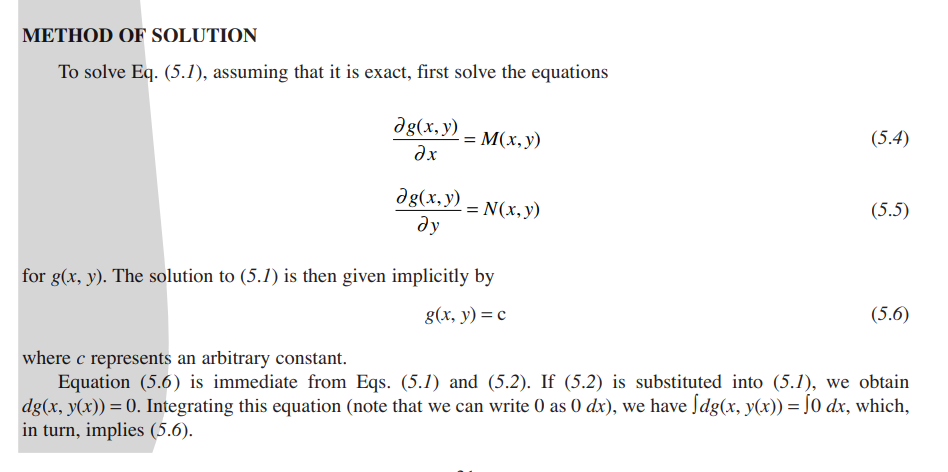

In [2]:
Image(filename='./img/img1.png')

In [228]:
# 4.1
fu_y1, fu_y, fu_x, fu_x1,  psi, psi_y, psi_x, x, y, y1,  m, b, a, c, c1, c2, t, dx, dy, ty, tx, k, v, dv, u, du, psi_t = sp.symbols(
    'fu_y1, fu_y, fu_x, fu_x1, psi, psi_y, psi_x, x, y, y1,  m, b, a, c, c1, c2, t, dx, dy, ty, tx, k, v, dv, u, du, psi_t')


In [4]:
# Examples 
# Start with a differntial equation
E1 = sp.Eq(y * sp.cos(x) + 2 * x * sp.E**y + (sp.sin(x) + x**2 * sp.E**y - 1) * y1, 0)
E1

Eq(2*x*exp(y) + y*cos(x) + y1*(x**2*exp(y) + sin(x) - 1), 0)

In [5]:
# Note that as there is 2 functions in (x, y) and one of these 

# first break up into 2 functions in (x, y)

M = y * sp.cos(x) + 2 * x * sp.E**y
N = (sp.sin(x) + x**2 * sp.E**y - 1) 
RTL([M, N])

In [6]:
# check if partial of E2 with respect to t, is equivalent to E3 with repsect to x. Note you ignore 
# y1 or dy/dx

In [7]:
sp.diff(M, y)

2*x*exp(y) + cos(x)

In [8]:
sp.diff(N, x)

2*x*exp(y) + cos(x)

In [9]:
# there fore E1 with respect to y == E2 with respect to x
# they are exact, so can use strategy



If exact, it means that we have $M(x, y)$ and $N(x, y)$ where $N(x, y)$ is $\frac{dx}{dy}$ derivative

and $M_y = N_x$ (i.e. derivatives are equivalent) 

This means there must be some value, $\psi$ which: 

$$ \psi_x = M $$
$$ \psi_y = N $$

And this allows us to write the equation as 

$$ \frac{d}{dx} \psi = 0 $$

Note we start with M(x, y) + N(x, y)y`

In [10]:
# if derivative of psi with rewspect to x we can get a value for psi 

In [11]:
PSI = sp.integrate(M, x) + fu_y
PSI

fu_y + x**2*exp(y) + y*sin(x)

In [12]:
# now we can date the derivative of  Psi with respect to y to get the function N

In [13]:
E1 = sp.diff(PSI, y) + fu_y1

In [14]:
# this is equal to N

In [15]:
E2 = sp.Eq(E1, N)
E2

Eq(fu_y1 + x**2*exp(y) + sin(x), x**2*exp(y) + sin(x) - 1)

In [16]:
# we can now solve for f'(y)

E3 = sp.solve(E2, fu_y1)
RTL(E3)

In [17]:
# now find f(y)
E4 = sp.integrate(E3[0], y)
E4

-y

In [18]:
PSI

fu_y + x**2*exp(y) + y*sin(x)

In [19]:
# Example 2

E1 = sp.Eq(2*x + 3  + y1 * (2 * y - 2), 0)
E1

Eq(2*x + y1*(2*y - 2) + 3, 0)

In [20]:
M = 2 * x + 3
N = (2 * y - 2)

In [21]:
# M with respect to y, should be the same N with respect to x
sp.diff(M, y)

0

In [22]:
sp.diff(N, x)

0

In [23]:
# So these are exact equations and we can solve using 


If exact, it means that we have $M(x, y)$ and $N(x, y)$ where $N(x, y)$ is $\frac{dx}{dy}$ derivative

and $M_y = N_x$ (i.e. derivatives are equivalent) 

This means there must be some value, $\psi$ which: 

$$ \psi_x = M $$
$$ \psi_y = N $$

And this allows us to write the equation as 

$$ \frac{d}{dx} \psi = 0 $$

In [24]:
# This means there is some function psi whose differative with respect to x = M, and whose 
# derivative with respect y = N

In [25]:
# PSI is integrale of M, and add some function fo y
PSI = sp.Eq(psi, sp.integrate(M, x) + fu_y)
PSI

Eq(psi, fu_y + x**2 + 3*x)

In [26]:
# now we have a value for psi, so its deriavitive with respect to y must == n

E2 = sp.Eq(sp.diff(PSI, y), N)
E3 = sp.Eq(fu_y1, E2.rhs )
E3

Eq(fu_y1, 2*y - 2)

In [27]:
E4 = sp.Eq(fu_y, sp.integrate(E3.rhs, y))
E4

Eq(fu_y, y**2 - 2*y)

In [28]:
# now we can solve for psi

E5 = PSI.subs(fu_y, E4.rhs)
E5

Eq(psi, x**2 + 3*x + y**2 - 2*y)

In [29]:
# we know this is equal to c
E6 = E5.subs({psi: c})
E6

Eq(c, x**2 + 3*x + y**2 - 2*y)

In [30]:
# Example

E1 = sp.Eq((3 * x**2 - 2 * x * y + 2)  + (6 * y**2 - x**2 + 3) * dy/dx, 0 )
E1

Eq(3*x**2 - 2*x*y + 2 + dy*(-x**2 + 6*y**2 + 3)/dx, 0)

In [31]:
# to solve this as a differential equation

# first check if this is an exact equation


If exact, it means that we have $M(x, y)$ and $N(x, y)$ where $N(x, y)$ is $\frac{dx}{dy}$ derivative

and $M_y = N_x$ (i.e. derivatives are equivalent) 

This means there must be some value, $\psi$ which: 

$$ \psi_x = M $$
$$ \psi_y = N $$

And this allows us to write the equation as 

$$ \frac{d}{dx} \psi = 0 $$

In [32]:
M = 3 * x**2 - 2 * x * y + 2
N = 6 * y**2 - x**2 + 3
RTL([M, N])

In [33]:
sp.diff(M, y) == sp.diff(N, x)

True

In [34]:
# this is an exact equation so we can use this methododogy solve it. 
PSI = sp.Eq(psi, sp.integrate(M, x) + fu_y)
PSI

Eq(psi, fu_y + x**3 - x**2*y + 2*x)

In [35]:
# find the value of psi_y, 

PSI_Y = sp.Eq(psi_y, sp.diff(x**3 - x**2 * y + 2 * x, y) + fu_y1)
PSI_Y


Eq(psi_y, fu_y1 - x**2)

In [36]:
# psi, y == N so...

E2 = sp.Eq(N, PSI_Y.rhs).simplify()
E2

Eq(fu_y1 - x**2, -x**2 + 6*y**2 + 3)

In [37]:
# now find the function of y
E3 = sp.Eq(E2.lhs + x**2, E2.rhs + x**2)
E3

Eq(fu_y1, 6*y**2 + 3)

In [38]:
E4 = sp.Eq(fu_y, sp.integrate(E3.rhs, y))
E4

Eq(fu_y, 2*y**3 + 3*y)

In [39]:
# subs to value for psi
E5 = PSI.subs({fu_y: E4.rhs})
E5

Eq(psi, x**3 - x**2*y + 2*x + 2*y**3 + 3*y)

In [40]:
# we know that psi can be set to c
E6 = E5.subs({psi: c})
E6

Eq(c, x**3 - x**2*y + 2*x + 2*y**3 + 3*y)

In [41]:
# 5.1

M = 2 * x * y
N = 1 + x**2

In [42]:
sp.diff(M, y) == sp.diff(N, x)

True

In [43]:
# this is exact, so we can apply 

If exact, it means that we have $M(x, y)$ and $N(x, y)$ where $N(x, y)$ is $\frac{dx}{dy}$ derivative

and $M_y = N_x$ (i.e. derivatives are equivalent) 

This means there must be some value, $\psi$ which: 

$$ \psi_x = M $$
$$ \psi_y = N $$

And this allows us to write the equation as 

$$ \frac{d}{dx} \psi = 0 $$

In [44]:
# derivative of psi with resxpect to x is M, so find psi
E1 = sp.Eq(psi, sp.integrate(M, x) + fu_y)
E1

Eq(psi, fu_y + x**2*y)

In [45]:
# We now know psi, find psi with respect to y
E2 = sp.Eq(psi_y, sp.diff(E1.rhs, y) + fu_y1)
E2

Eq(psi_y, fu_y1 + x**2)

In [46]:
# substitute N
E3 = E2.subs({psi_y: N})
E3

Eq(x**2 + 1, fu_y1 + x**2)

In [47]:
# find fuy
E4 = sp.Eq(fu_y, 1)

In [48]:
# subs back into psi

E5 = E1.subs({fu_y: E4.rhs})
E5

Eq(psi, x**2*y + 1)

In [49]:
# put in c subs
E6 = E5.subs({psi: c})
E6

Eq(c, x**2*y + 1)

In [50]:
# now solve for y
E7 = sp.solve(E6, y)
RTL(E7)

In [51]:
# 5.3

In [52]:
M = y
N = -x
sp.diff(M, y) == sp.diff(N, x)

False

In [53]:
# Not exact, so cant use this method to solve


In [54]:
# 5.4
M = x + sp.sin(y)
N = x * sp.cos(y) - 2 * y
RTL([M, N])

In [55]:
# check if they are exact
sp.diff(M, y) == sp.diff(N, x)

True

In [56]:
# they are exact, so we can use the following 

This means there must be some value, $\psi$ which: 

$$ \psi_x = M $$
$$ \psi_y = N $$

And this allows us to write the equation as 

$$ \frac{d}{dx} \psi = 0 $$

In [57]:
# start find psi and add a f(y) to the end 
E1 = sp.Eq(psi, sp.integrate(M, x) + fu_y)
E1

Eq(psi, fu_y + x**2/2 + x*sin(y))

In [58]:
# now the challenge is to find fuy. Note that a way to do find derivative

In [59]:
E2 = sp.Eq(psi_y,  sp.diff(E1.rhs, y) + fu_y1)
E2

Eq(psi_y, fu_y1 + x*cos(y))

In [60]:
# equate this to N and find fuy

In [61]:
E3 = sp.Eq(N, E2.rhs)
E3

Eq(x*cos(y) - 2*y, fu_y1 + x*cos(y))

In [62]:
E4 = sp.Eq(fu_y1, sp.solve(E3, fu_y1)[0])
E4

Eq(fu_y1, -2*y)

In [63]:
# now find fuy
E5 = sp.Eq(fu_y, sp.integrate(E4.rhs, y))
E5

Eq(fu_y, -y**2)

In [64]:
# subs back into to psi function
E6 = E1.subs({fu_y: E5.rhs})
E6

Eq(psi, x**2/2 + x*sin(y) - y**2)

In [65]:
# set psi to c
E7 = E6.subs({psi: c})
E7

Eq(c, x**2/2 + x*sin(y) - y**2)

In [66]:
# can only have implicit result

In [67]:
# 5.6
E1 = sp.Eq(dy / dx, (2 + y * sp.E**(x * y)) / (2 * y - x * sp.E**(x * y)))
E1

Eq(dy/dx, (y*exp(x*y) + 2)/(-x*exp(x*y) + 2*y))

In [68]:
# put it into form to text for exactness

In [69]:
E2 = sp.Eq(E1.lhs * dx * sp.fraction(E1.rhs)[1] - E1.rhs * dx * sp.fraction(E1.rhs)[1], 0)
E2

Eq(-dx*(y*exp(x*y) + 2) + dy*(-x*exp(x*y) + 2*y), 0)

In [70]:
E3 = sp.Eq(E2.lhs * -1, E2.rhs * -1)
E3

Eq(dx*(y*exp(x*y) + 2) - dy*(-x*exp(x*y) + 2*y), 0)

In [71]:
# test if they are exact
M = y * sp.E**(x * y) + 2
N = x * sp.E**(x * y) - 2 * y
RTL([M, N])

In [72]:
sp.diff(M, y) == sp.diff(N, x)

True

In [73]:
# they are exact, so we can use the following identities

This means there must be some value, $\psi$ which: 

$$ \psi_x = M $$
$$ \psi_y = N $$

And this allows us to write the equation as 

$$ \frac{d}{dx} \psi = 0 $$

In [74]:
# first find a value for psi, noting that it will have addtional funciton in y
E4 = sp.Eq(psi, sp.integrate(M, x) + fu_y)
E4

Eq(psi, fu_y + 2*x + exp(x*y))

In [75]:
# next challenge is to use the other idenity, psi with repect to y = N. 
# find the value of psi with repsect to y first
E5 = sp.Eq(psi_y, sp.diff(E4.rhs, y) + fu_y1)
E5

Eq(psi_y, fu_y1 + x*exp(x*y))

In [76]:
# Now we can use identiy for N
E6 = sp.Eq(N, E5.rhs)
E6

Eq(x*exp(x*y) - 2*y, fu_y1 + x*exp(x*y))

In [77]:
# solve for fuy which I need to get value for psi
E7 = sp.Eq(fu_y1, sp.solve(E6, fu_y1)[0])
E7

Eq(fu_y1, -2*y)

In [78]:
# Now get fuy by integrating
E8 = sp.Eq(fu_y, sp.integrate(E7.rhs, y))
E8

Eq(fu_y, -y**2)

In [79]:
# now we can subs back in to psi
E9 = E4.subs({fu_y: E8.rhs})
E9

Eq(psi, 2*x - y**2 + exp(x*y))

In [80]:
# now equate psi to c
E10 = E9.subs({psi: c})
E10

Eq(c, 2*x - y**2 + exp(x*y))

In [81]:
# must be left in implicity form. so this function is a solution to the differential equatoin

In [82]:
# 5.7, 5.8

In [83]:
# It may be possible to solve this differential equation using identities arising from exact diff equations
M = y**2
N = 2 * y * t + 1
RTL([M, N])

In [84]:
# test if this is an exact equation
sp.diff(M, y) == sp.diff(N, t)

True

In [85]:
# this is an exact differential equation so the following identity will hold

This means there must be some value, $\psi$ which: 

$$ \psi_x = M $$
$$ \psi_y = N $$

And this allows us to write the equation as 

$$ \frac{d}{dx} \psi = 0 $$

In [86]:
# find a value for psi
E1 = sp.Eq(psi, sp.integrate(M, t) + fu_y)
E1

Eq(psi, fu_y + t*y**2)

In [87]:
# it is also possible psi with respect to y, and then this can be equated with N
E2 = sp.Eq(psi_y, sp.diff(E1.rhs, y) + fu_y1)
E2

Eq(psi_y, fu_y1 + 2*t*y)

In [88]:
#note that psi with reespect to y is N and make the subs
E3 = sp.Eq(N, E2.rhs)
E3

Eq(2*t*y + 1, fu_y1 + 2*t*y)

In [89]:
# how solve fuy1
E4 = sp.Eq(fu_y1, sp.solve(E3, fu_y1)[0])
E4

Eq(fu_y1, 1)

In [90]:
# to get the fuy fundtion 
E5 = sp.Eq(fu_y, sp.integrate(E4.rhs, y))
E5

Eq(fu_y, y)

In [91]:
# Now subs back into for Psi
E6 = E1.subs({fu_y: E5.rhs})
E6

Eq(psi, t*y**2 + y)

In [92]:
# we now have a function for psi(x, y) = note that it can be equated to c
E7 = E6.subs({psi: c})
E7

Eq(c, t*y**2 + y)

In [93]:
# solve for y is possible
E8 = sp.solve(E7, y)
RTL(E8)

In [94]:
# 5.9, 5.10
# Test if this is exact

M = 2 * x**2 * t - 2 * x**3
N = 4 * x**3 - 6 * x**2 * t + 2 * x * t**2
RTL([M, N])


In [95]:
# check if they are exact
sp.diff(M, x) == sp.diff(N, t)

True

In [96]:
# these are exact differential equations, so can use identities: 

If exact, it means that we have $M(x, y)$ and $N(x, y)$ where $N(x, y)$ is $\frac{dx}{dy}$ derivative

and $M_y = N_x$ (i.e. derivatives are equivalent) 

This means there must be some value, $\psi$ which: 

$$ \psi_t = M $$
$$ \psi_x = N $$

And this allows us to write the equation as 

$$ \frac{d}{dx} \psi = 0 $$

In [97]:
# find a value for t, be sure to add some other function
E1 = sp.Eq(psi, sp.integrate(M, t) + fu_x)
E1

Eq(psi, fu_x + t**2*x**2 - 2*t*x**3)

In [98]:
# find the derivative of this which will be equivalent to N
E2 = sp.Eq(psi_x, sp.diff(E1.rhs, x) + fu_x1)
E2

Eq(psi_x, fu_x1 + 2*t**2*x - 6*t*x**2)

In [99]:
# Now equate to N
E3 = sp.Eq(N, E2.rhs)
E3

Eq(2*t**2*x - 6*t*x**2 + 4*x**3, fu_x1 + 2*t**2*x - 6*t*x**2)

In [100]:
# solve for fux1
E4 = sp.Eq(fu_x1, sp.solve(E3, fu_x1)[0])
E4

Eq(fu_x1, 4*x**3)

In [101]:
# get the antiderivative of this to find fux
E5 = sp.Eq(fu_x, sp.integrate(E4.rhs, x))
E5

Eq(fu_x, x**4)

In [102]:
# subs this back into psi
E6 = E1.subs({fu_x: E5.rhs})
E6

Eq(psi, t**2*x**2 - 2*t*x**3 + x**4)

In [103]:
# change psi to c
E7 = E6.subs({psi: c})
E7

Eq(c, t**2*x**2 - 2*t*x**3 + x**4)

In [104]:
# solve as a function of x if possible
sp.solve(E7, x)[0].simplify()

t/2 - sqrt(-4*sqrt(c) + t**2)/2

In [105]:
RTL(sp.solve(E7, x))

In [106]:
sp.solve(E7, x)[0].subs({c: c**2}).simplify()

t/2 - sqrt(t**2 - 4*sqrt(c**2))/2

In [107]:
# 5.11

E1 = sp.Eq(dy / dx, (- 2 * x * y) / (1 + x**2))
E1

Eq(dy/dx, -2*x*y/(x**2 + 1))

In [108]:
E2 = sp.Eq(E1.lhs * dx * sp.fraction(E1.rhs)[1], E1.rhs * dx * sp.fraction(E1.rhs)[0])
E2

Eq(dy*(x**2 + 1), 4*dx*x**2*y**2/(x**2 + 1))

In [109]:
M = 2 * x * y
N = 1 + x**2

In [110]:
sp.diff(M, y) == sp.diff(N, x)

True

In [111]:
# this is an exact eqution, so the following identities hold

If exact, it means that we have $M(x, y)$ and $N(x, y)$ where $N(x, y)$ is $\frac{dx}{dy}$ derivative

and $M_y = N_x$ (i.e. derivatives are equivalent) 

This means there must be some value, $\psi$ which: 

$$ \psi_x = M $$
$$ \psi_y = N $$

And this allows us to write the equation as 

$$ \frac{d}{dx} \psi = 0 $$

In [112]:
# find a value for psi

E3 = sp.Eq(psi, sp.integrate(M, y) + fu_y)
E3

Eq(psi, fu_y + x*y**2)

In [113]:
# now find derivative of psi with respect to y
E4 = sp.Eq(psi_y, sp.diff(E3.rhs, y) + fu_y1) 
E4

Eq(psi_y, fu_y1 + 2*x*y)

In [114]:
# By the identity, this is == N
E5 = sp.Eq(N, E4.rhs)
E5

Eq(x**2 + 1, fu_y1 + 2*x*y)

In [115]:
# find the falue fuy1
E6 = sp.Eq(fu_y1, sp.solve(E5, fu_y1)[0])
E6

Eq(fu_y1, x**2 - 2*x*y + 1)

In [116]:
# Integrate this to get function in y
E7 = sp.Eq(fu_y, sp.integrate(E6.rhs, y))
E7

Eq(fu_y, -x*y**2 + y*(x**2 + 1))

In [117]:
# subs in 
E8 = E3.subs({fu_y: E7.rhs})
E8

Eq(psi, y*(x**2 + 1))

In [118]:
# set to c
E9 = E8.subs({psi: c}).expand()
E9

Eq(c, x**2*y + y)

In [119]:
# solve for 
# set an initial condigion
E10 = E9.subs({x: 2, y: -5})
E10

Eq(c, -25)

In [120]:
# subs in to the solution
E11 = E9.subs({c: -25})

In [121]:
# 5.12
M = y**2
N = 2 * y * t + 1
RTL([M, N])

In [122]:
# test if this is exact
sp.diff(M, y) == sp.diff(N, t)

True

In [123]:
# This is exact. This means the following identities are true: 

If exact, it means that we have $M(x, y)$ and $N(x, y)$ where $N(x, y)$ is $\frac{dx}{dy}$ derivative

and $M_y = N_x$ (i.e. derivatives are equivalent) 

This means there must be some value, $\psi$ which: 

$$ \psi_t = M $$
$$ \psi_y = N $$

And this allows us to write the equation as 

$$ \frac{d}{dx} \psi = 0 $$

In [124]:
# find a value for psi
E1 = sp.Eq(psi, sp.integrate(M, t) + fu_y)
E1

Eq(psi, fu_y + t*y**2)

In [125]:
# Now use this to find the value of psi with respect to y
E2 = sp.Eq(psi_y, sp.diff(E1.rhs, y) + fu_y1)
E2

Eq(psi_y, fu_y1 + 2*t*y)

In [126]:
# now with a value of psi with respect to y, use identiy to subs

In [127]:
E3 = sp.Eq(N, E2.rhs)
E3

Eq(2*t*y + 1, fu_y1 + 2*t*y)

In [128]:
# Now solve for function in y prime
E4 = sp.Eq(fu_y1, sp.solve(E3, fu_y1)[0])
E4

Eq(fu_y1, 1)

In [129]:
# now integrate this so can be used in a subs
E5 = sp.Eq(fu_y, sp.integrate(E4.rhs, y))
E5

Eq(fu_y, y)

In [130]:
# now subs into equation for psi
E6 = E1.subs({fu_y: y})
E6

Eq(psi, t*y**2 + y)

In [131]:
# change psi to c
E7 = E6.subs({psi: c})
E7

Eq(c, t*y**2 + y)

In [132]:
# now set an initial cidon
E8 = E7.subs({t : 1, y: -2})
E8

Eq(c, 2)

In [133]:
# Not put into final equation
E9 = E7.subs({c: 2})
E9

Eq(2, t*y**2 + y)

In [134]:
# solve for y
E10 = sp.solve(E9, y)[0]
E10

(sqrt(8*t + 1) - 1)/(2*t)

In [135]:
# 5.14
E1 = sp.Eq(y * dx - x * dy, 0)
E1

Eq(dx*y - dy*x, 0)

In [136]:
# check for integrating factor
E2 = sp.Eq(E1.lhs * -1 / x**2, E1.rhs * -1 / x**2).simplify()
E2

Eq((-dx*y + dy*x)/x**2, 0)

In [137]:
M = - y / x**2
N = 1 / x
sp.diff(M, y) == sp.diff(N, x)

True

In [138]:
E3 = sp.Eq(E2.lhs / dx * x / y, E2.rhs / dx * x / y)
E3

Eq((-dx*y + dy*x)/(dx*x*y), 0)

In [139]:
# 5.24
M = y + 2 *x *  y**3
N = (1 + 3 * x**2 * y**2 + x)
RTL([M, N])

In [140]:
# check if this is an exact equation 
sp.diff(M, y) == sp.diff(N, x)

True

In [141]:
# this is exact so we can rely on the following identities 

Identity 1: 
$$ \psi_x = M $$
$$ \psi_y = N $$

Identity 2: 
$$ \frac{d}{dx} \psi = 0 $$

In [142]:
# find a value for psi
E1 = sp.Eq(psi, sp.integrate(M, x) + fu_y)
E1

Eq(psi, fu_y + x**2*y**3 + x*y)

In [143]:
# now find the derivative of psi with respect to y based on thiis value for psi
E2 = sp.Eq(psi_y, sp.diff(E1.rhs, y) + fu_y1)
E2

Eq(psi_y, fu_y1 + 3*x**2*y**2 + x)

In [144]:
# note that psi with respect y is equivalent to N
E3 = sp.Eq(N, E2.rhs)
E3

Eq(3*x**2*y**2 + x + 1, fu_y1 + 3*x**2*y**2 + x)

In [145]:
# solve for function of y'
E4 = sp.Eq(fu_y1, sp.solve(E3, fu_y1)[0])
E4

Eq(fu_y1, 1)

In [146]:
# use this subsution in above value for psi
E5 = E1.subs({fu_y: E4.rhs})
E5

Eq(psi, x**2*y**3 + x*y + 1)

In [147]:
# replace psi with c
E6 = E5.subs({psi: c})
E6.simplify()

Eq(c, x**2*y**3 + x*y + 1)

In [148]:
# 5.25
M = x * y + 1
N = x * y - 1
RTL([M, N])

In [149]:
sp.diff(M, y) == sp.diff(N, x)

False

In [150]:
# not exact, cant be solved using this method

In [151]:
# 5.26
M = sp.E**x**3 * (3 * x**2 * y - x**2)
N = sp.E**x**3
RTL([M, N])

In [152]:
sp.diff(M, y) == sp.diff(N, x)

True

In [153]:
# This is an exact differential equation and can be solved using the following identities

Identity 1: 
$$ \psi_x = M $$
$$ \psi_y = N $$

Identity 2: 
$$ \frac{d}{dx} \psi = 0 $$

In [154]:
# find a value for psi
E1 = sp.Eq(psi, sp.integrate(M, x) + fu_y)
E1

Eq(psi, fu_y + (3*y - 1)*exp(x**3)/3)

In [155]:
# find a value for psi with repect to y
E2 = sp.Eq(psi_y, sp.diff(E1.rhs, y) + fu_y1)
E2

Eq(psi_y, fu_y1 + exp(x**3))

In [156]:
# Use the substition - first derivative of psi == N
E3 = E2.subs({psi_y: N})
E3

Eq(exp(x**3), fu_y1 + exp(x**3))

In [157]:
# solve for first derivative of f(y)
E4 = sp.Eq(fu_y1, sp.solve(E3, fu_y1)[0])
E4

Eq(fu_y1, 0)

In [158]:
# take the antiderivative of f(y)'
sp.integrate(0, y)

0

In [159]:
E5 = E1.subs({psi: c, fu_y: 0})
E5

Eq(c, (3*y - 1)*exp(x**3)/3)

In [160]:
sp.solve(E5, y)[0]

c*exp(-x**3) + 1/3

In [161]:
# 5.27
M = 3 * x**2 * y**2
N = 2 * x**3 * y + 4 * y**3
RTL([M, N])


In [162]:
# test if this an exact differential equation
sp.diff(M, y) == sp.diff(N, x)

True

In [163]:
# As it is exact, the following strategy can be used: 

Identity 1: 
$$ \psi_x = M $$
$$ \psi_y = N $$

Identity 2: 
$$ \frac{d}{dx} \psi = 0 $$

In [164]:
# find a value for psi by taking the anitderivative of M
E1 = sp.Eq(psi, sp.integrate(M, x) + fu_y)
E1

Eq(psi, fu_y + x**3*y**2)

In [165]:
# find a value for psi with respect y
E2 = sp.Eq(psi_y, sp.diff(E1.rhs, y) + fu_y1)
E2

Eq(psi_y, fu_y1 + 2*x**3*y)

In [166]:
# Now use N as a subsution for psi wrt y
E3 = E2.subs({psi_y: N})
E3

Eq(2*x**3*y + 4*y**3, fu_y1 + 2*x**3*y)

In [167]:
# solve for first derivative of y
E4 = sp.Eq(fu_y1, sp.solve(E3, fu_y1)[0])
E4

Eq(fu_y1, 4*y**3)

In [168]:
# Take the antiderivative of first derivative of y
E5 = sp.Eq(fu_y, sp.integrate(E4.rhs))
E5

Eq(fu_y, y**4)

In [169]:
# Subsitute this into the expression for psi
E6 = E1.subs({fu_y: E5.rhs})
E6

Eq(psi, x**3*y**2 + y**4)

In [170]:
# Subs psi for c
E7 = E6.subs({psi: c})
E7

Eq(c, x**3*y**2 + y**4)

In [171]:
# leave in implicit form

In [172]:
# 5.28
M = y
N = x
RTL([M, N])

In [173]:
# Test if this is an exact differential equation

In [174]:
sp.diff(y, x) == sp.diff(x, y)

True

In [175]:
# This is an exact equation so can be solved with the following strategy

Identity 1: 
$$ \psi_x = M $$
$$ \psi_y = N $$

Identity 2: 
$$ \frac{d}{dx} \psi = 0 $$

In [176]:
# find a value for Psi using M
E1 = sp.Eq(psi, sp.integrate(M, x) + fu_y)
E1

Eq(psi, fu_y + x*y)

In [177]:
# now find psi with respect to y

In [178]:
E2 = sp.Eq(psi_y, sp.diff(E1.rhs, y) + fu_y1)
E2

Eq(psi_y, fu_y1 + x)

In [179]:
# subs in N
E3 = E2.subs({psi_y: N})
E3

Eq(x, fu_y1 + x)

In [180]:
# so c == xy

In [181]:
# 5.29
M = x - y
N = x + y
RTL([M, N])


In [182]:
# check if this i exact differential equation

In [183]:
sp.diff(M, y) == sp.diff(N, x)

False

In [184]:
# not exact

In [185]:
# 5.30

In [186]:
M = y * sp.sin(x) + x * y * sp.cos(x)
N = x * sp.sin(x) + 1
RTL([M, N])

In [187]:
# check if this an exact differential equation

In [188]:
sp.diff(M, y) == sp.diff(N, x)

True

In [189]:
# This is exact, so can be solved with the following strategy: 

Identity 1: 
$$ \psi_x = M $$
$$ \psi_y = N $$

Identity 2: 
$$ \frac{d}{dx} \psi = 0 $$

In [216]:
# Find a value for psi
E1 = sp.Eq(psi, sp.integrate(M, x) + fu_y)
E1

Eq(psi, fu_y - x*y**2/t**2)

In [217]:
# fin the firs psi wrt y 
E2 = sp.Eq(psi_y, sp.diff(E1.rhs, y) + fu_y1)
E2

Eq(psi_y, fu_y1 - 2*x*y/t**2)

In [218]:
# Now subs psi wrt y
E3 = E2.subs({psi_y: N})
E3

Eq(2*y/t, fu_y1 - 2*x*y/t**2)

In [219]:
# now solve for y prime
E4 = sp.Eq(fu_y1, sp.solve(E3, fu_y1)[0])
E4

Eq(fu_y1, 2*y*(t + x)/t**2)

In [220]:
# now find f(y)
E5 = sp.Eq(fu_y, sp.integrate(E4.rhs, y))
E5

Eq(fu_y, y**2*(t + x)/t**2)

In [221]:
# Now subs back into psi 
E6 = E1.subs({fu_y: E5.rhs})
E6

Eq(psi, -x*y**2/t**2 + y**2*(t + x)/t**2)

In [222]:
E7 = E6.subs({psi: c})
E7

Eq(c, -x*y**2/t**2 + y**2*(t + x)/t**2)

In [223]:
# Try and solve for y

In [224]:
RTL(sp.solve(E7, y))

In [272]:
psi, psi_wrt_t, psi_wrt_x, psi_wrt_y, fu_y, fu_y_prime, fu_t, fu_t_prime, fu_x, fu_x_prime, fu_t_prime, x, y, t = sp.symbols(
  'psi, psi_wrt_t, psi_wrt_x, psi_wrt_y, fu_y, fu_y_prime, fu_t, fu_t_prime, fu_x, fu_x_prime,  fu_t_prime, x, y, t'
)

In [246]:
#5.31
M = -y**2 / t**2
N = (2 * y) / t
RTL([M, N])

In [247]:
# Test if this is an exact equation
sp.diff(M, y) == sp.diff(N, t)

True

In [205]:
# this is an exact euquation so can be solved using the following identities: 

Identity 1: 
$$ \psi_t = M $$
$$ \psi_y = N $$

Identity 2: 
$$ \frac{d}{dt} \psi = 0 $$

In [260]:
# find a value of psi

E1 = sp.Eq(psi, sp.integrate(M, t) + fu_y)
E1

Eq(psi, fu_y + y**2/t)

In [266]:
# Now we can differential to get psi wrt y
E2 = sp.Eq(psi_wrt_y, sp.diff(E1.rhs, y) + fu_y_prime)
E2

Eq(psi_wrt_y, fu_y_prime + 2*y/t)

In [267]:

E3 = sp.Eq(N, E2.rhs)
E3

Eq(2*y/t, fu_y_prime + 2*y/t)

In [268]:
# get a value for fuyprime
E4 = sp.Eq(fu_y_prime, 0)
E4

Eq(fu_y_prime, 0)

In [270]:
# then integrate this to get fuy
E5 = sp.Eq(fu_y, sp.integrate(0, y))
E5

Eq(fu_y, 0)

In [271]:
# Then subs back in

In [274]:
# 5.32
# Declare variables
psi, psi_wrt_t, psi_wrt_x, psi_wrt_y, fu_y, fu_y_prime, fu_t, fu_t_prime, fu_x, fu_x_prime, fu_t_prime, x, y, t = sp.symbols(
  'psi, psi_wrt_t, psi_wrt_x, psi_wrt_y, fu_y, fu_y_prime, fu_t, fu_t_prime, fu_x, fu_x_prime,  fu_t_prime, x, y, t'
)

In [275]:
# This question looks like checking if exact may help
# Assign values of M and N

M = - (2 * y) / t**3
N = 1 / t**2
RTL([M, N])

In [276]:
sp.diff(M, y) == sp.diff(N, t)

True

In [277]:
# This is an exact differential equation so we can use the following identities:

Identity 1: 
$$ \psi_t = M $$
$$ \psi_y = N $$

Identity 2: 
$$ \frac{d}{dt} \psi = 0 $$

In [278]:
# Start be finding a value for psi
E1 = sp.Eq(psi, sp.integrate(M, t) + fu_y)
E1

Eq(psi, fu_y + y/t**2)

In [279]:
# Get psi wrt y
E2 = sp.Eq(psi_wrt_y, sp.diff(E1.rhs, y) + fu_y_prime)
E2

Eq(psi_wrt_y, fu_y_prime + t**(-2))

In [280]:
# I know that psi wrt y == N
E3 = sp.Eq(N, E2.rhs)
E3

Eq(t**(-2), fu_y_prime + t**(-2))

In [281]:
# NOw solve for fu y prime
E4 = sp.Eq(fu_y_prime, sp.solve(E3, fu_y_prime)[0])
E4

Eq(fu_y_prime, 0)

In [282]:
# Integrate this to get a value for f(y)
E5 = sp.Eq(fu_y, sp.integrate(E4.rhs, y))
E5

Eq(fu_y, 0)

In [284]:
# Subs into original psi funciton and replace psi with t
E6 = E1.subs({psi: c, fu_y: 0})
E6

Eq(c, y/t**2)

In [285]:
# 5.33
# declare some variables

psi, psi_wrt_t, psi_wrt_x, psi_wrt_y, fu_y, fu_y_prime, fu_t, fu_t_prime, fu_x, fu_x_prime, fu_t_prime, x, y, t = sp.symbols(
  'psi, psi_wrt_t, psi_wrt_x, psi_wrt_y, fu_y, fu_y_prime, fu_t, fu_t_prime, fu_x, fu_x_prime,  fu_t_prime, x, y, t'
)

In [286]:
# This question may be solvable via an exact equation 
M = y**2
N = t**2

In [287]:
# Test if this is an exact differential equation

In [288]:
sp.diff(M, y) == sp.diff(N, t)

False

In [289]:
# Not solvable using this strategy

In [290]:
# 5.34
# Declare some variables 

psi, psi_wrt_t, psi_wrt_x, psi_wrt_y, fu_y, fu_y_prime, fu_t, fu_t_prime, fu_x, fu_x_prime, fu_t_prime, x, y, t = sp.symbols(
  'psi, psi_wrt_t, psi_wrt_x, psi_wrt_y, fu_y, fu_y_prime, fu_t, fu_t_prime, fu_x, fu_x_prime,  fu_t_prime, x, y, t'
)

In [291]:
# Check if this is an exact differential equation

In [293]:
M = 4 * t**3 * y**3 - 2 * t * y
N = 3 * t**4 * y**2 - t**2
RTL([M, N])

In [294]:
# check if exact
sp.diff(M, y) == sp.diff(N, t)

True

In [296]:
# Exact, so following equivalencies will hold

Identity 1: 
$$ \psi_t = M $$
$$ \psi_y = N $$

Identity 2: 
$$ \frac{d}{dt} \psi = 0 $$

In [297]:
# find a value of psi
E1 = sp.Eq(psi, sp.integrate(M, t) + fu_y)
E1

Eq(psi, fu_y + t**4*y**3 - t**2*y)

In [298]:
# Now find psi wrt y
E2 = sp.Eq(psi_wrt_y, sp.diff(E1.rhs, y) + fu_y_prime)
E2

Eq(psi_wrt_y, fu_y_prime + 3*t**4*y**2 - t**2)

In [299]:
# Subs in N
E3 = sp.Eq(N, E2.rhs)
E3

Eq(3*t**4*y**2 - t**2, fu_y_prime + 3*t**4*y**2 - t**2)

In [300]:
# solve for f(y)`
E4 = sp.Eq(fu_y_prime, sp.solve(E3, fu_y_prime)[0])
E4

Eq(fu_y_prime, 0)

In [301]:
# find f(y)

In [302]:
E5 = sp.Eq(fu_y, sp.integrate(E4.rhs, y))
E5

Eq(fu_y, 0)

In [303]:
# subs into psi equation
E6 = E1.subs({psi: c, fu_y: 0})
E6

Eq(c, t**4*y**3 - t**2*y)

In [305]:
# 5.35
# Declare variables
psi, psi_wrt_t, psi_wrt_x, psi_wrt_y, fu_y, fu_y_prime, fu_t, fu_t_prime, fu_x, fu_x_prime, fu_t_prime, x, y, t = sp.symbols(
  'psi, psi_wrt_t, psi_wrt_x, psi_wrt_y, fu_y, fu_y_prime, fu_t, fu_t_prime, fu_x, fu_x_prime,  fu_t_prime, x, y, t'
)

In [307]:
# Check if it is an exact differntial equation
M = (t * y - 1) / (t**2 * y)
N = - 1 / (t * y**2)
RTL([M, N])

In [313]:
# check if this is an exact differential equation
sp.diff(M, y).simplify() == sp.diff(N, t).simplify()

True

In [314]:
# these are exact so can be solved using the following equivalencies: 

Identity 1: 
$$ \psi_t = M $$
$$ \psi_y = N $$

Identity 2: 
$$ \frac{d}{dt} \psi = 0 $$

In [315]:
# start by findinf a value for psi
E1 = sp.Eq(psi, sp.integrate(M, t) + fu_y)
E1

Eq(psi, fu_y + (y*log(t) + 1/t)/y)

In [317]:
# Now find a value psi wrt y
E2 = sp.Eq(psi_wrt_y, sp.diff(E1.rhs, y) + fu_y_prime)
E2

Eq(psi_wrt_y, fu_y_prime + log(t)/y - (y*log(t) + 1/t)/y**2)

In [318]:
# Now use identity inovling N
E3 = sp.Eq(N, E2.rhs)
E3

Eq(-1/(t*y**2), fu_y_prime + log(t)/y - (y*log(t) + 1/t)/y**2)

In [319]:
# solve for fuy`
E4 = sp.Eq(fu_y_prime, sp.solve(E3,fu_y_prime)[0])
E4

Eq(fu_y_prime, 0)

In [321]:
E5 = E1.subs({psi: c, fu_y: 0})
E5.simplify()

Eq(c, log(t) + 1/(t*y))

In [324]:
sp.solve(E5, y)[0].expand()

1/(c*t - t*log(t))

In [325]:
# 5.36
# Declare variables
psi, psi_wrt_t, psi_wrt_x, psi_wrt_y, fu_y, fu_y_prime, fu_t, fu_t_prime, fu_x, fu_x_prime, fu_t_prime, x, y, t = sp.symbols(
  'psi, psi_wrt_t, psi_wrt_x, psi_wrt_y, fu_y, fu_y_prime, fu_t, fu_t_prime, fu_x, fu_x_prime,  fu_t_prime, x, y, t'
)

In [326]:
M = t **2 - x
N = -t
RTL([M, N])

In [330]:
sp.diff(M, x).simplify() == sp.diff(N, t).simplify()

True

Identity 1: 
$$ \psi_t = M $$
$$ \psi_x = N $$

Identity 2: 
$$ \frac{d}{dt} \psi = 0 $$

In [331]:
# Find a value for psi using identity involving M
E1 = sp.Eq(psi, sp.integrate(M, t) + fu_x)
E1

Eq(psi, fu_x + t**3/3 - t*x)

In [333]:
# now differentiate with respect to x
E2 = sp.Eq(psi_wrt_x, sp.diff(E1.rhs, x) + fu_x_prime)
E2

Eq(psi_wrt_x, fu_x_prime - t)

In [334]:
# subs in N
E3 = sp.Eq(N, E2.rhs)
E3

Eq(-t, fu_x_prime - t)

In [336]:
# solve for fx`
E4 = sp.Eq(fu_x_prime, 0)
E4

Eq(fu_x_prime, 0)

In [337]:
# integerate to get fx
E5 = sp.Eq(fu_x, sp.integrate(E4.rhs, x))
E5

Eq(fu_x, 0)

In [338]:
# subs in
E6 = E1.subs({psi: c, fu_x: 0})
E6

Eq(c, t**3/3 - t*x)

In [342]:
sp.solve(E6, x)[0].expand()

-c/t + t**2/3

In [343]:
# 5.37
# Declare variables
psi, psi_wrt_t, psi_wrt_x, psi_wrt_y, fu_y, fu_y_prime, fu_t, fu_t_prime, fu_x, fu_x_prime, fu_t_prime, x, y, t = sp.symbols(
  'psi, psi_wrt_t, psi_wrt_x, psi_wrt_y, fu_y, fu_y_prime, fu_t, fu_t_prime, fu_x, fu_x_prime,  fu_t_prime, x, y, t'
)

In [344]:
M = t**2 + x**2
N = 2 * t * x - x
RTL([M, N])

In [345]:
# this is an exact differential equation. The following identities can be used

Identity 1: 
$$ \psi_t = M $$
$$ \psi_x = N $$

Identity 2: 
$$ \frac{d}{dt} \psi = 0 $$

In [346]:
# find a value for psi
E1 = sp.Eq(psi, sp.integrate(M, t) + fu_x)
E1

Eq(psi, fu_x + t**3/3 + t*x**2)

In [348]:
# Now find psi with respect to x
E2 = sp.Eq(psi_wrt_x, sp.diff(E1.rhs, x) + fu_x_prime)
E2

Eq(psi_wrt_x, fu_x_prime + 2*t*x)

In [349]:
# subs in N
E3 = sp.Eq(N, E2.rhs)
E3

Eq(2*t*x - x, fu_x_prime + 2*t*x)

In [351]:
# solve for fx`
E4 = sp.Eq(fu_x_prime, sp.solve(E3, fu_x_prime)[0])
E4

Eq(fu_x_prime, -x)

In [352]:
# integrate to get f(x)
E5 = sp.Eq(fu_x, sp.integrate(E4.rhs, x))
E5

Eq(fu_x, -x**2/2)

In [354]:
# subs into original equation involving psi
E6 = E1.subs({psi: c, fu_x: E5.rhs}).simplify()
E6

Eq(c, t**3/3 + t*x**2 - x**2/2)

In [356]:
sp.solve(E6, x)[0].simplify()

-sqrt(6)*sqrt((3*c - t**3)/(2*t - 1))/3

In [357]:
# 5.38
psi, psi_wrt_t, psi_wrt_x, psi_wrt_y, fu_y, fu_y_prime, fu_t, fu_t_prime, fu_x, fu_x_prime, fu_t_prime, x, y, t = sp.symbols(
  'psi, psi_wrt_t, psi_wrt_x, psi_wrt_y, fu_y, fu_y_prime, fu_t, fu_t_prime, fu_x, fu_x_prime,  fu_t_prime, x, y, t'
)

In [358]:
M = 2 * x * sp.E**( 2 * t)
N = 1 + sp.E**(2 *t)
RTL([M, N])

In [359]:
# check if this is an exact differential equation
sp.diff(M, x).simplify() == sp.diff(N, t).simplify()

True

In [360]:
# It is exact, so following identities can be used

Identity 1: 
$$ \psi_t = M $$
$$ \psi_x = N $$

Identity 2: 
$$ \frac{d}{dt} \psi = 0 $$

In [361]:
# find a value for psi
E1 = sp.Eq(psi, sp.integrate(M, t) + fu_x)
E1

Eq(psi, fu_x + x*exp(2*t))

In [364]:
# find psi wrt x
E2 = sp.Eq(psi_wrt_x, sp.diff(E1.rhs, x) + fu_x_prime)
E2

Eq(psi_wrt_x, fu_x_prime + exp(2*t))

In [365]:
# subs in N
E3 = sp.Eq(N, E2.rhs)
E3

Eq(exp(2*t) + 1, fu_x_prime + exp(2*t))

In [366]:
# solve for fx`
E4 = sp.Eq(fu_x_prime, sp.solve(E3, fu_x_prime)[0])
E4

Eq(fu_x_prime, 1)

In [367]:
# integrate to find fux
E5 = sp.Eq(fu_x, sp.integrate(E4.rhs, x))
E5

Eq(fu_x, x)

In [368]:
# subs back into E1
E6 = E1.subs({psi: c, fu_x: E5.rhs})
E6

Eq(c, x*exp(2*t) + x)

In [370]:
sp.solve(E6, x)[0]

c/(exp(2*t) + 1)

In [371]:
# 5.39
psi, psi_wrt_t, psi_wrt_x, psi_wrt_y, fu_y, fu_y_prime, fu_t, fu_t_prime, fu_x, fu_x_prime, fu_t_prime, x, y, t = sp.symbols(
  'psi, psi_wrt_t, psi_wrt_x, psi_wrt_y, fu_y, fu_y_prime, fu_t, fu_t_prime, fu_x, fu_x_prime,  fu_t_prime, x, y, t'
)

In [373]:
M = sp.sin(t) * sp.cos(x)
N = -sp.sin(x) * sp.cos(t)
RTL([M, N])

In [374]:
# test if this is an exact differential equation
sp.diff(M, x).simplify == sp.diff(N, t).simplify()

False

In [375]:
# not exact

In [376]:
# 5.40
psi, psi_wrt_t, psi_wrt_x, psi_wrt_y, fu_y, fu_y_prime, fu_t, fu_t_prime, fu_x, fu_x_prime, fu_t_prime, x, y, t = sp.symbols(
  'psi, psi_wrt_t, psi_wrt_x, psi_wrt_y, fu_y, fu_y_prime, fu_t, fu_t_prime, fu_x, fu_x_prime,  fu_t_prime, x, y, t'
)

In [377]:
M = sp.cos(x) +x * sp.cos(t)
N = sp.sin(t) - t * sp.sin(x)
RTL([M, N])

In [378]:
# check if exact
sp.diff(M, x).simplify() == sp.diff(N, t).simplify()

True

In [379]:
# is exact so following holds: 

Identity 1: 
$$ \psi_t = M $$
$$ \psi_x = N $$

Identity 2: 
$$ \frac{d}{dt} \psi = 0 $$

In [380]:
# find a value for psi
E1 = sp.Eq(psi, sp.integrate(M, t) + fu_x)
E1

Eq(psi, fu_x + t*cos(x) + x*sin(t))

In [381]:
# find psi wrt x
E2 = sp.Eq(psi_wrt_x, sp.diff(E1.rhs, x) + fu_x_prime)
E2

Eq(psi_wrt_x, fu_x_prime - t*sin(x) + sin(t))

In [382]:
# subs in N
E3 = sp.Eq(N, E2.rhs)
E3

Eq(-t*sin(x) + sin(t), fu_x_prime - t*sin(x) + sin(t))

In [384]:
# solve for fx`
E4 = sp.Eq(fu_x_prime, sp.solve(E3, fu_x_prime)[0])
E4

Eq(fu_x_prime, 0)

In [388]:
# find fx
E5 = sp.Eq(fu_x, sp.integrate(E4.rhs, x))
E5

Eq(fu_x, 0)

In [389]:
# subs in to psi
E6 = E1.subs({psi: c, fu_x: 0})
E6

Eq(c, t*cos(x) + x*sin(t))

In [390]:
# WORK THROUGH INTEGRATING FACTORS